In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
apple = cv2.imread(r"C:\Users\aliay\OneDrive\Desktop\py_test\computer vision\dataset\apple2.jpg")
orange = cv2.imread(r"C:\Users\aliay\OneDrive\Desktop\py_test\computer vision\dataset\orange.jpg")
# Both of images u will make a blinding to them should be the same size 
print(apple.shape)
print(orange.shape)

(512, 512, 3)
(512, 512, 3)


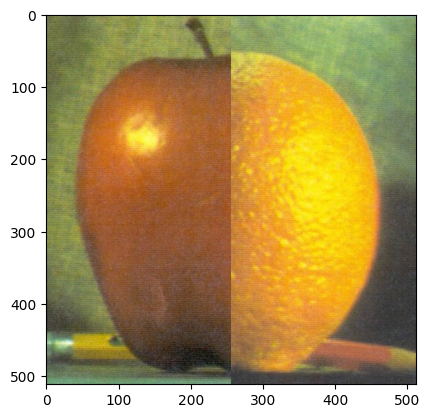

In [4]:
# hstack >>> btdmg 2 pics 3la b3d bs msh bt3ml blinding  
apple_orange = np.hstack((apple[:,:256],orange[:,256:]))
apple_orange = cv2.cvtColor(apple_orange,cv2.COLOR_BGR2RGB)
plt.imshow(apple_orange)

In [5]:
# generate Gaussian pyramid for apple 
apple_copy = apple.copy()
gp_apple = [apple_copy]
for i in range(6):
    apple_copy = cv2.pyrDown(apple_copy)
    gp_apple.append(apple_copy)

# generate Gaussian pyramid for orange  
orange_copy = orange.copy()
gp_orange = [orange_copy]
for i in range(6):
    orange_copy = cv2.pyrDown(orange_copy)
    gp_orange.append(orange_copy)
 

In [6]:
# as we know in lablacian we start from the last image in gaussian


# generate Lablcian pyramid for apple 
apple_copy = gp_apple[5]
lp_apple = [apple_copy]
# In the Laplacian pyramid, each level (except the top-most) is obtained by taking the difference between the current level of the Gaussian pyramid 
# and the image obtained by upsampling the next (higher resolution) level in the Gaussian pyramid.
for i in range(5,0,-1):
    gaussian_expanded = cv2.pyrUp(gp_apple[i])
    laplacian = cv2.subtract(gp_apple[i-1],gaussian_expanded)
    lp_apple.append(laplacian)




# generate Lablcian pyramid for orange  
orange_copy = gp_orange[5]
lp_orange = [orange_copy]
# In the Laplacian pyramid, each level (except the top-most) is obtained by taking the difference between the current level of the Gaussian pyramid 
# and the image obtained by upsampling the next (higher resolution) level in the Gaussian pyramid.
for i in range(5,0,-1):
    gaussian_expanded = cv2.pyrUp(gp_orange[i])
    laplacian = cv2.subtract(gp_orange[i-1],gaussian_expanded)
    lp_orange.append(laplacian) 

In [7]:
apple_orange_pyramid = []
# zip >> bt3ml mapping lltnen m3a b3d 
for apple_lap,orange_lap in zip(lp_apple,lp_orange):
    col,row,ch = apple_lap.shape

    laplacian = np.hstack((apple_lap[:,:int(col/2)],orange_lap[:,int(col/2):]))
    apple_orange_pyramid.append(laplacian)

In [8]:
# reconstruct 
apple_orange_reconstuct = apple_orange_pyramid[0]
cv2.imshow("img0",apple_orange_reconstuct)
cv2.waitKey(0)
cv2.destroyAllWindows()
# we need to get the higher one so .. 

In [9]:
for i in range(1,6):
    apple_orange_reconstuct = cv2.pyrUp(apple_orange_reconstuct)
    apple_orange_reconstuct = cv2.add(apple_orange_pyramid[i],apple_orange_reconstuct)

cv2.imshow("apple",apple)
cv2.imshow("orange",orange)
cv2.imshow("apple_orange_reconstuct",apple_orange_reconstuct)
cv2.waitKey(0)
cv2.destroyAllWindows()

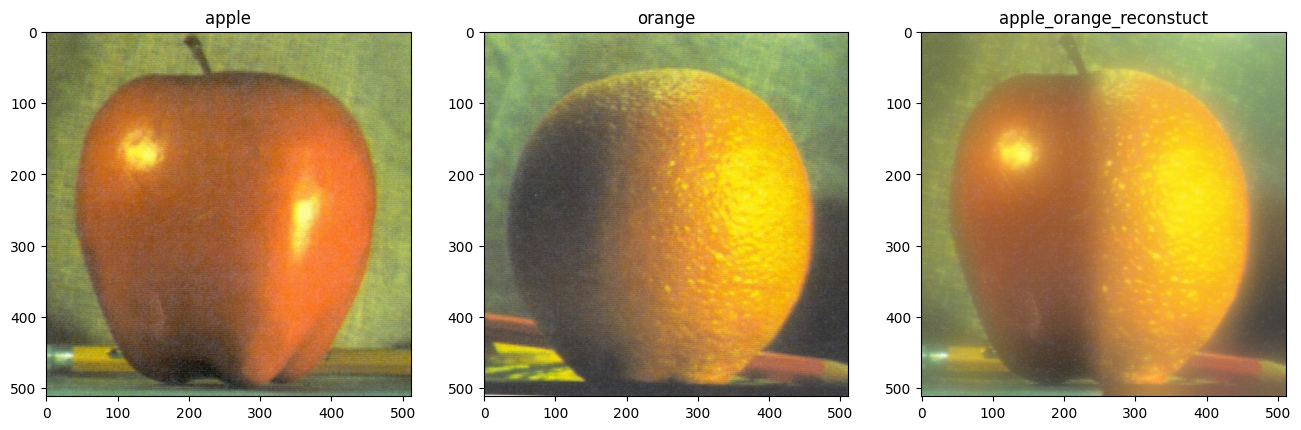

In [11]:
apple = cv2.cvtColor(apple,cv2.COLOR_BGR2RGB)
orange = cv2.cvtColor(orange,cv2.COLOR_BGR2RGB)
apple_orange_reconstuct = cv2.cvtColor(apple_orange_reconstuct,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,10))
plt.subplot(131), plt.imshow(apple), plt.title("apple")
plt.subplot(132), plt.imshow(orange), plt.title("orange")
plt.subplot(133), plt.imshow(apple_orange_reconstuct), plt.title("apple_orange_reconstuct")
plt.show()